<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/kaggle/MBTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-01-22

### MBTI - kaggle
### https://www.kaggle.com/laowingkin/mbti-study-personality 참고

### 1. 라이브러리 import 및 데이터 load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/가은/2022/MBTI/mbti_1.csv")
df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

### 2. 데이터 분석

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [4]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [5]:
df['posts'].value_counts()

'With INTJs I feel that strong sense of attraction in every inch of my body. It's very exhilarating, and super exciting! Unfortunately, I met very, very few of them in real life. INFJs on the other...|||Hi, Twichl! One of my all-time favourite people is an INTP, so I have a thing or two to say about you INTPs.  We went to school together for a year, and I was close friends with one of his best...|||Hello, Sherlock(4869)! Firstly, I'd like to start off by saying I'm sorry that you have gone through all of that. Secondly, I'd like to congratulate you for choosing not to take your life; that is...|||RendingTempest Ninjaws thank you, thank you. Pleased to make your acquaintance! :kitteh:|||Hello there, everyone! I'm Veritas well, not really, but let's call me that because it's an uber cool name. I'm quite familiar with Personality Cafe, and I think it's a rather lovely place to be to...|||And I miss the days of a life still permanent  Mourn the years before I got carried away  So now I'm s

In [6]:
def var_row(row) :
    l = []
    for i in row.split("|||") :     # 50개 항목의 섹션(각 항목은 "|||"(파이프 문자 3개)로 구분됨)
        l.append(len(i.split()))
    return np.var(l)
    # numpy.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)[source]
    # 지정된 축을 따라 분산을 계산

# 열 생성
df['words_per_comment'] = df['posts'].apply(lambda x : len(x.split())/50)     # 왜 50으로 나눌까 아 적은 포스트가 50개!
df['variance_of_word_counts'] = df['posts'].apply(lambda x : var_row(x))      # 분산!
df.head()


type  ... variance_of_word_counts
0  INFJ  ...                135.2900
1  ENTP  ...                187.4756
2  INTP  ...                180.6900
3  INTJ  ...                181.8324
4  ENTJ  ...                196.4576

[5 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

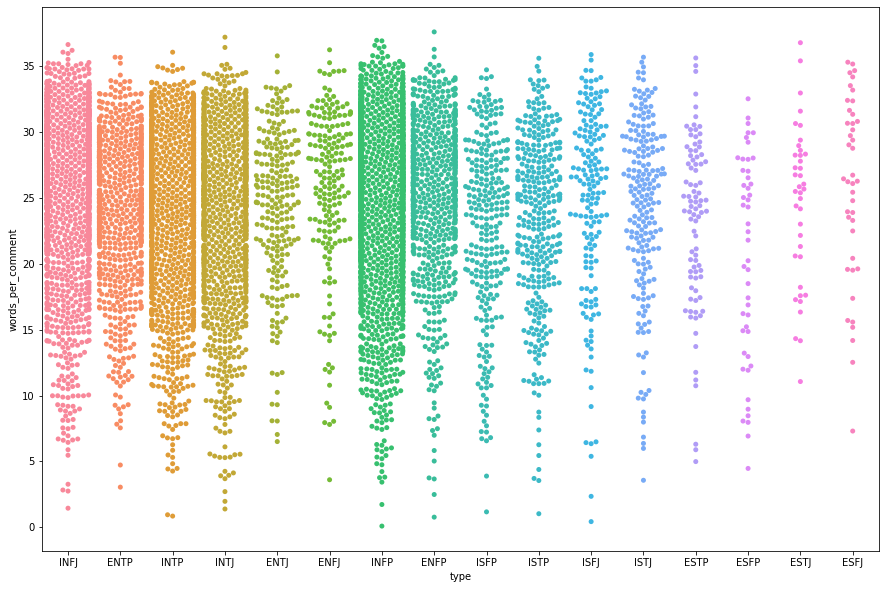

In [7]:
plt.figure(figsize = (15,10))
sns.swarmplot("type", "words_per_comment", data = df)

In [8]:
# df에서 type 를 그룹(묶고)만들고, agg해서 type 의 count 구하기
df.groupby("type").agg({"type" : "count"})

type
type      
ENFJ   190
ENFP   675
ENTJ   231
ENTP   685
ESFJ    42
ESFP    48
ESTJ    39
ESTP    89
INFJ  1470
INFP  1832
INTJ  1091
INTP  1304
ISFJ   166
ISFP   271
ISTJ   205
ISTP   337

In [9]:
# 왜 저 네개의 MBTI 는 뺏을까??
# isin() 메소드 안의 값이 들어 있으면 True, 아니면 False 반환

df_2 = df[~df['type'].isin(['ESFJ', 'ESFP', 'ESTJ', 'ESTP'])]
df_2['http_per_comment'] = df_2['posts'].apply(lambda x : x.count("http")/50)
df_2['qm_per_comment'] = df_2['posts'].apply(lambda x : x.count("?")/50)
df_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


type  ... qm_per_comment
0  INFJ  ...           0.36
1  ENTP  ...           0.10
2  INTP  ...           0.24
3  INTJ  ...           0.22
4  ENTJ  ...           0.20

[5 rows x 6 columns]

In [10]:
df_2.groupby("type").agg({"http_per_comment" : "mean"})

http_per_comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009

In [11]:
df_2.groupby("type").agg({"qm_per_comment" : "mean"})

qm_per_comment
type                
ENFJ        0.213053
ENFP        0.227259
ENTJ        0.240000
ENTP        0.220964
INFJ        0.208966
INFP        0.202533
INTJ        0.214849
INTP        0.221580
ISFJ        0.200964
ISFP        0.216384
ISTJ        0.214927
ISTP        0.221602

In [12]:
df_3 = df.copy()
df_3['http_per_comment'] = df_3['posts'].apply(lambda x : x.count("http")/50)
df_3['qm_per_comment'] = df_3['posts'].apply(lambda x : x.count("?")/50)


df_5 = df_3[df_3['type'].isin(['ESFJ', 'ESFP', 'ESTJ', 'ESTP'])]
df_5

type  ... qm_per_comment
113   ESTP  ...           0.40
160   ESTP  ...           0.40
200   ESFP  ...           0.26
346   ESTP  ...           0.12
394   ESTP  ...           0.32
...    ...  ...            ...
8406  ESFJ  ...           0.16
8426  ESFP  ...           0.10
8446  ESFJ  ...           0.18
8470  ESTP  ...           0.46
8658  ESFJ  ...           0.16

[218 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x720 with 0 Axes>

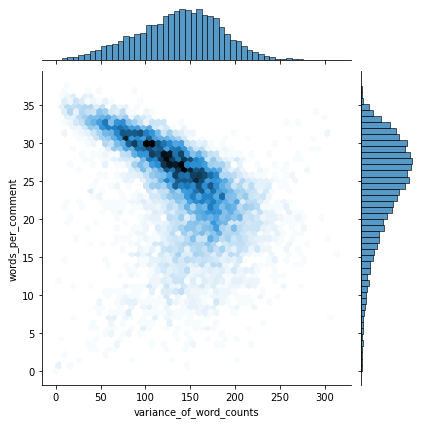

In [13]:
plt.figure(figsize=(15,10))
sns.jointplot("variance_of_word_counts", "words_per_comment", data = df_2 , kind = "hex")

In [14]:
df_2["type"].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

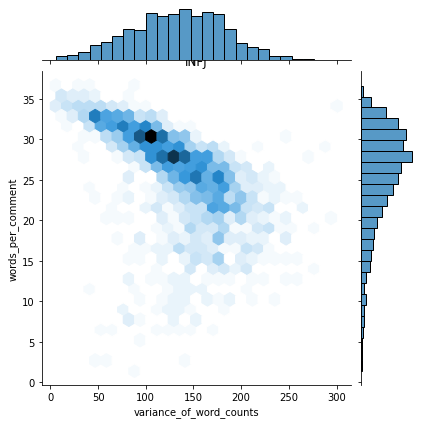

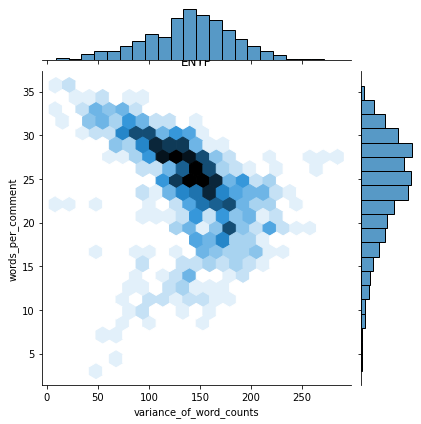

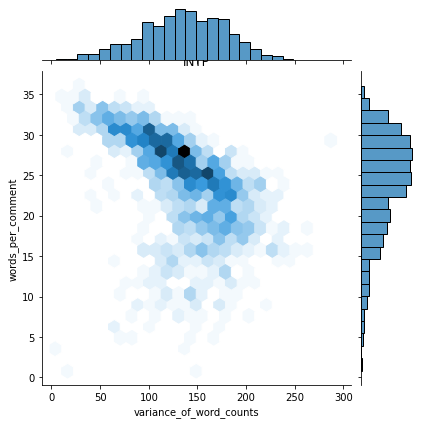

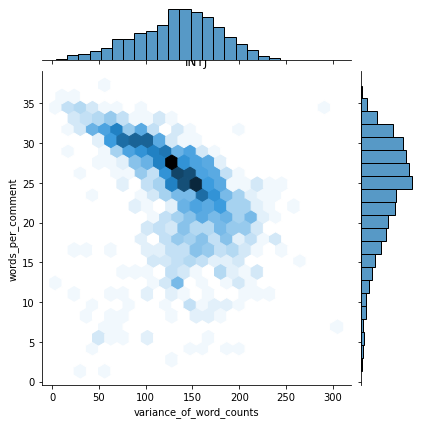

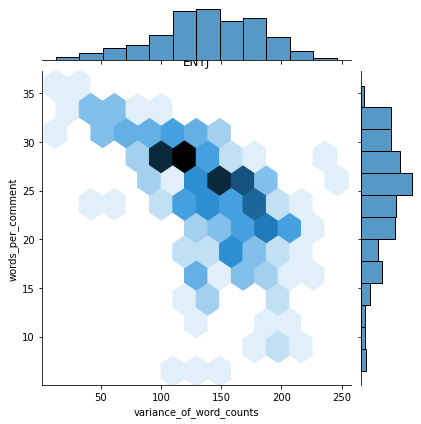

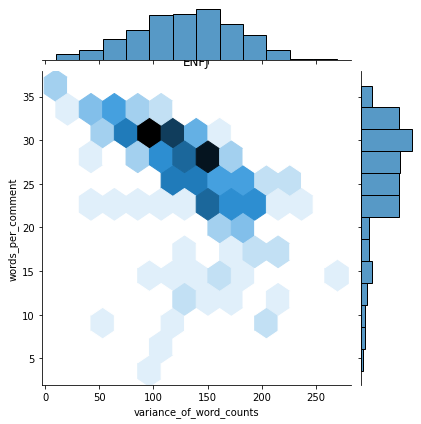

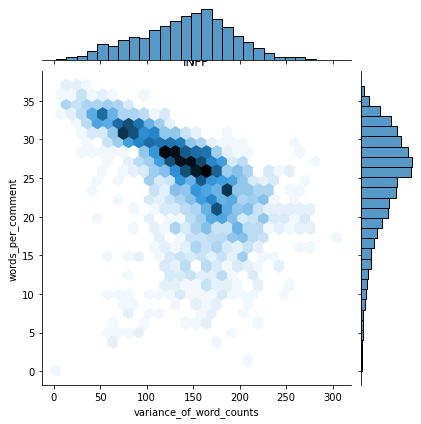

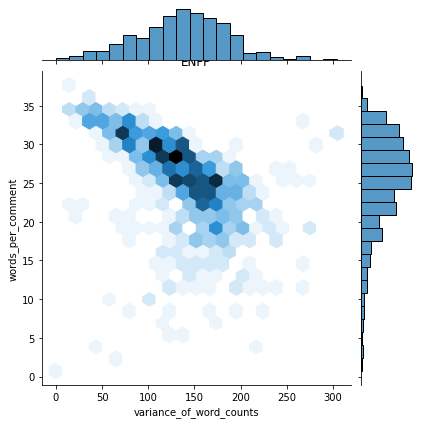

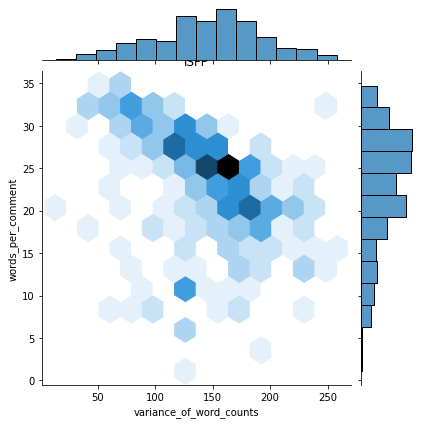

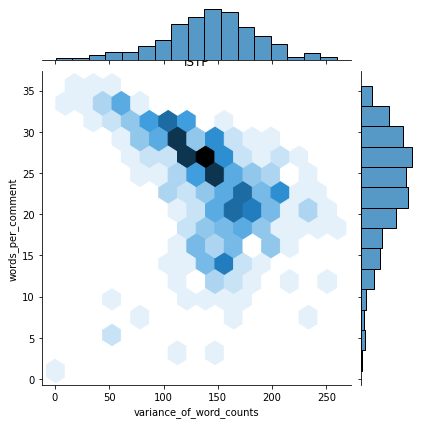

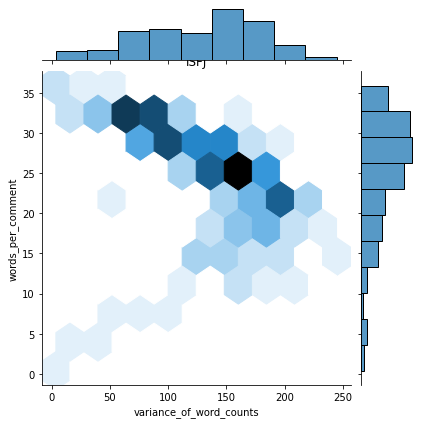

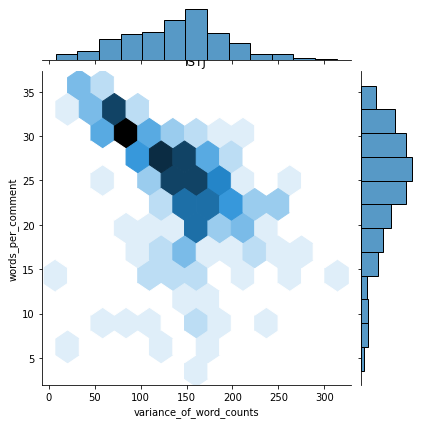

In [15]:
def plot_jointplot(mbti_type, axs, titles) :
    df_3 = df_2[df_2["type"] == mbti_type]
    sns.jointplot("variance_of_word_counts", "words_per_comment", data = df_3, kind = "hex", ax = axs, title = titles)

i = df_2["type"].unique()
k = 0
for m in range(0, 2) :
    for n in range(0, 6) :
        df_3 = df_2[df_2['type'] == i[k]]
        sns.jointplot("variance_of_word_counts", "words_per_comment", data = df_3, kind = "hex")
        plt.title(i[k])
        k += 1

In [16]:
!pip install scipy==1.1.0

In [17]:
!pip install Pillow

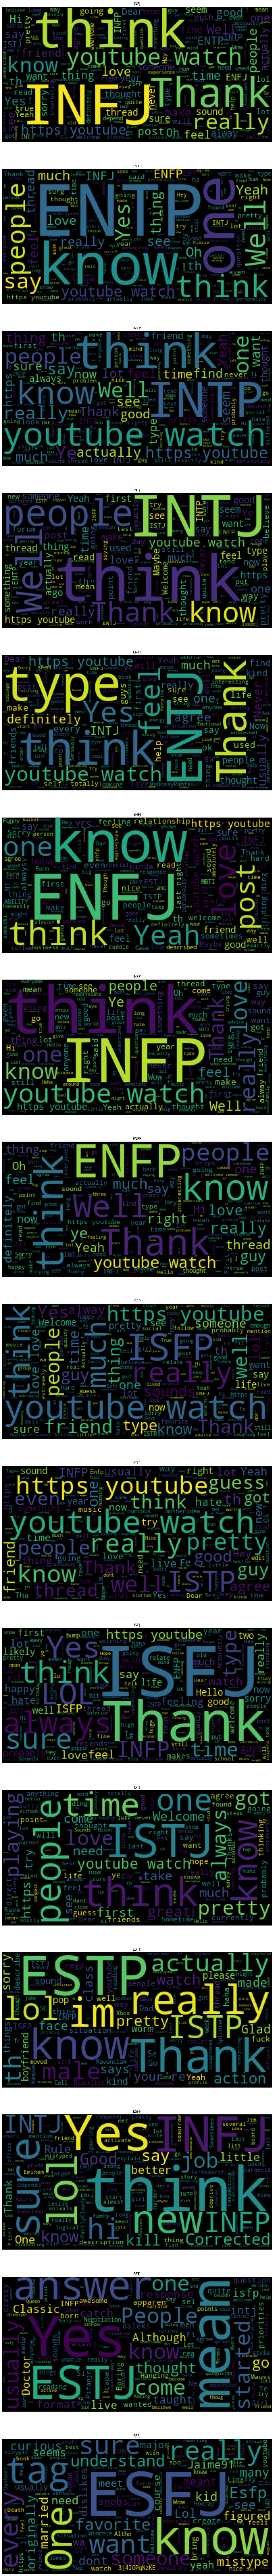

In [24]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
# 워드 클라우드 (wordcloud) : 특정 데이터나 텍스트에 자주 등장하는 핵심단어 시각화

fig, ax = plt.subplots(len(df['type'].unique()), sharex = True, figsize = (155, 10*len(df["type"].unique())))

k = 0
for i in df['type'].unique() :
    df_4 = df[df["type"] == i ]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k += 1

## 재미삼아서

In [76]:
aa = ["love you. hey what are you doing. I am very tired. and I have to diet ! love you. I guess you're still sleeping. I did sleep late last night.I'll be right back. Don't be sad that I went alone. You know I love you so much, right? I'll hurry back and go see you, so don't worry and rest at home and listen to the meeting well! I'm sorry that I'm going to send this kakaotalk and leave now, making you upset and grumpy about nothing yesterday. Uljagi is always doing well, but I'm the problem. Let's hurry up and do a lot of things that we didn't do yesterday. I always love you. When you wake up, call me if it's before I arrive. I love you so much love you very much love you  Woong Woong, good, good. Study hard at the best spot. Woong, you can review your classes during break time, so don't worry about me too much and contact me first. I love you."]

In [77]:
aa

["love you. hey what are you doing. I am very tired. and I have to diet ! love you. I guess you're still sleeping. I did sleep late last night.I'll be right back. Don't be sad that I went alone. You know I love you so much, right? I'll hurry back and go see you, so don't worry and rest at home and listen to the meeting well! I'm sorry that I'm going to send this kakaotalk and leave now, making you upset and grumpy about nothing yesterday. Uljagi is always doing well, but I'm the problem. Let's hurry up and do a lot of things that we didn't do yesterday. I always love you. When you wake up, call me if it's before I arrive. I love you so much love you very much love you  Woong Woong, good, good. Study hard at the best spot. Woong, you can review your classes during break time, so don't worry about me too much and contact me first. I love you."]

In [78]:
cc = pd.DataFrame(aa, index = ['1'], columns=["data"])
cc

data
1  love you. hey what are you doing. I am very ti...

In [79]:
len(cc["data"].unique())

1

In [80]:
len(df['type'].unique())

16

(-0.5, 399.5, 199.5, -0.5)

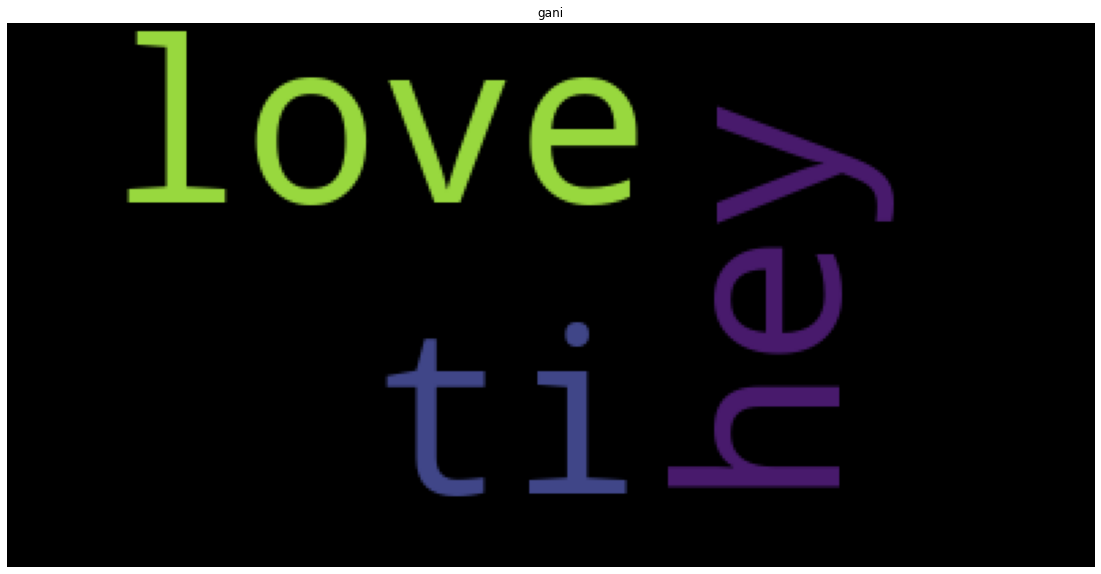

In [81]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS
# 워드 클라우드 (wordcloud) : 특정 데이터나 텍스트에 자주 등장하는 핵심단어 시각화

fig, ax = plt.subplots(1, sharex = True, figsize = (155, 10))


# for i in df['type'].unique() :
#     df_4 = df[df["type"] == i ]

wordcloud = WordCloud().generate(cc['data'].to_string())
ax.imshow(wordcloud)
ax.set_title("gani")
ax.axis("off")





이게 머람